<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/09_DeepLearning/Assignment/part1_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import and Data read

In [40]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn.model_selection import StratifiedKFold,KFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

tf.__version__

'2.4.1'

In [41]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Greatelearning/NN/Part- 1,2&3 - Signal.csv")
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
data.columns = data.columns.str.replace(" ","_")

### Exploratory Data Analysis

#### Data Type and Shape

In [43]:
data.shape

(1599, 12)

In [44]:
display("Shape of data")
display(data.shape)
display("Total missing value ")
display(data.isna().sum().sum())
display("Data type info")
display(data.info())

'Shape of data'

(1599, 12)

'Total missing value '

0

'Data type info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter_1      1599 non-null   float64
 1   Parameter_2      1599 non-null   float64
 2   Parameter_3      1599 non-null   float64
 3   Parameter_4      1599 non-null   float64
 4   Parameter_5      1599 non-null   float64
 5   Parameter_6      1599 non-null   float64
 6   Parameter_7      1599 non-null   float64
 7   Parameter_8      1599 non-null   float64
 8   Parameter_9      1599 non-null   float64
 9   Parameter_10     1599 non-null   float64
 10  Parameter_11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

 - No special character or missing values found in data

#### Correlation Matrix

In [45]:
# Correlation Matrix
corr_matrix = data.corr()
corr_matrix = round(corr_matrix,2)
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_matrix.style.applymap(lambda x: 'background-color : red' if abs(x) >=0.6 else '')

,Parameter_1,Parameter_2,Parameter_3,Parameter_4,Parameter_5,Parameter_6,Parameter_7,Parameter_8,Parameter_9,Parameter_10,Parameter_11,Signal_Strength
Parameter_1,1.000000,-0.260000,0.670000,0.110000,0.090000,-0.150000,-0.110000,0.670000,-0.680000,0.180000,-0.060000,0.120000
Parameter_2,-0.260000,1.000000,-0.550000,0.000000,0.060000,-0.010000,0.080000,0.020000,0.230000,-0.260000,-0.200000,-0.390000
Parameter_3,0.670000,-0.550000,1.000000,0.140000,0.200000,-0.060000,0.040000,0.360000,-0.540000,0.310000,0.110000,0.230000
Parameter_4,0.110000,0.000000,0.140000,1.000000,0.060000,0.190000,0.200000,0.360000,-0.090000,0.010000,0.040000,0.010000
Parameter_5,0.090000,0.060000,0.200000,0.060000,1.000000,0.010000,0.050000,0.200000,-0.270000,0.370000,-0.220000,-0.130000
Parameter_6,-0.150000,-0.010000,-0.060000,0.190000,0.010000,1.000000,0.670000,-0.020000,0.070000,0.050000,-0.070000,-0.050000
Parameter_7,-0.110000,0.080000,0.040000,0.200000,0.050000,0.670000,1.000000,0.070000,-0.070000,0.040000,-0.210000,-0.190000
Parameter_8,0.670000,0.020000,0.360000,0.360000,0.200000,-0.020000,0.070000,1.000000,-0.340000,0.150000,-0.500000,-0.170000
Parameter_9,-0.680000,0.230000,-0.540000,-0.090000,-0.270000,0.070000,-0.070000,-0.340000,1.000000,-0.200000,0.210000,-0.060000
Parameter_10,0.180000,-0.260000,0.310000,0.010000,0.370000,0.050000,0.040000,0.150000,-0.200000,1.000000,0.090000,0.250000


In [46]:
#sns.pairplot(data)

- Parameter 1 has postive correlation with parameter 3 & 8 and negative correlation with paramater 9
- Parameter 6 & 7 has postive correlation

#### Data Distribution

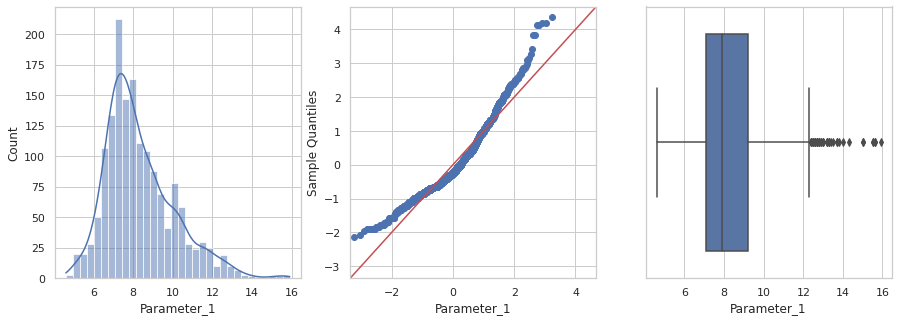

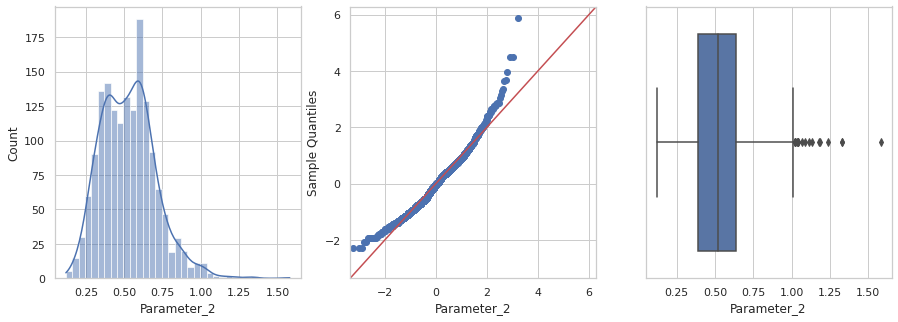

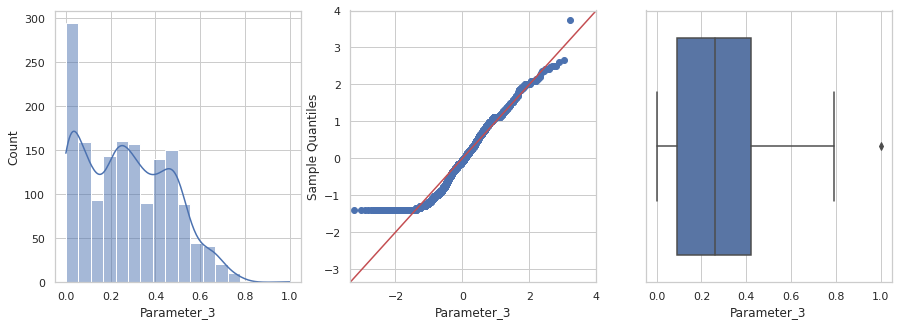

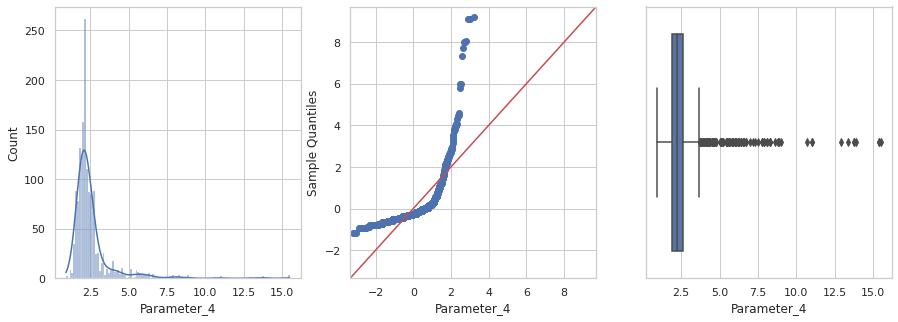

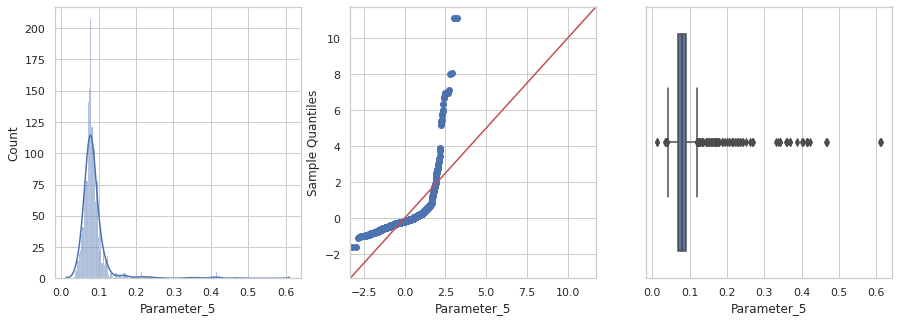

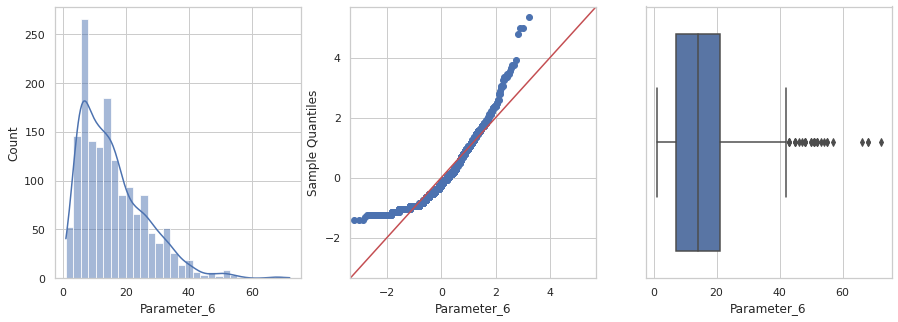

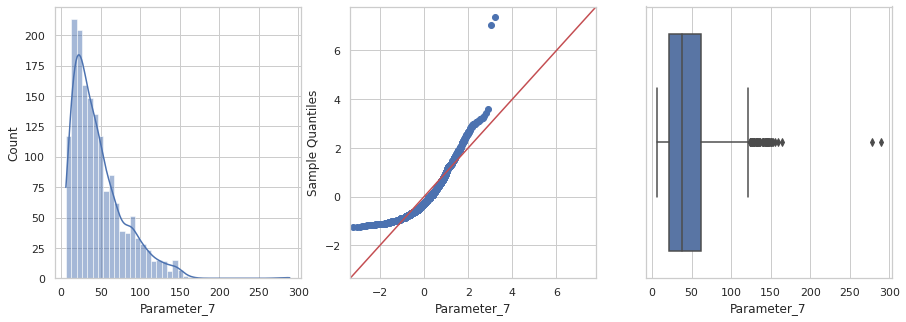

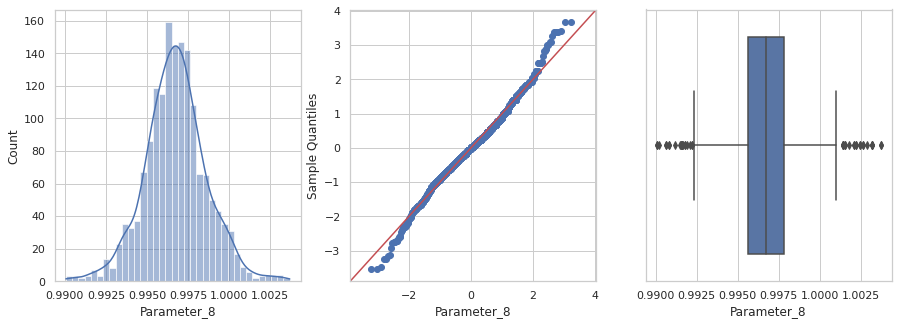

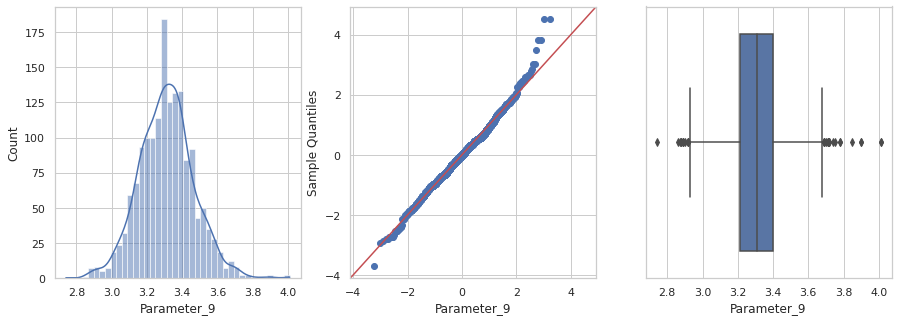

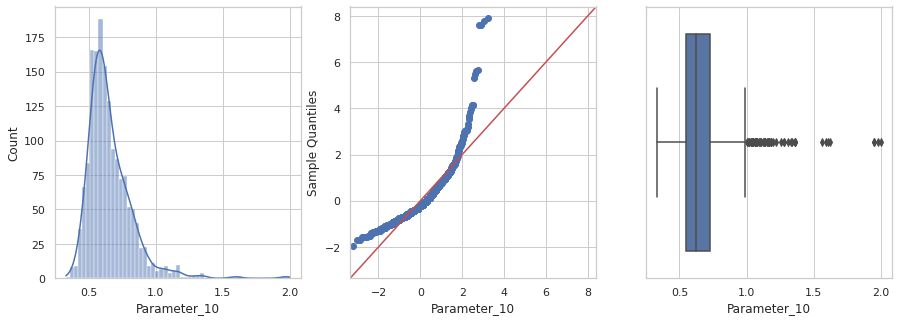

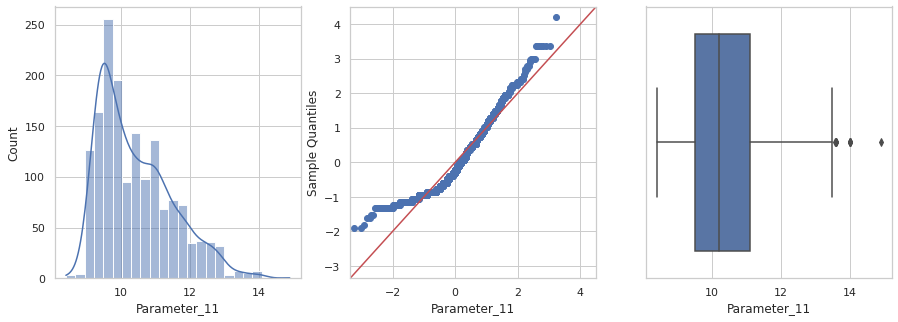

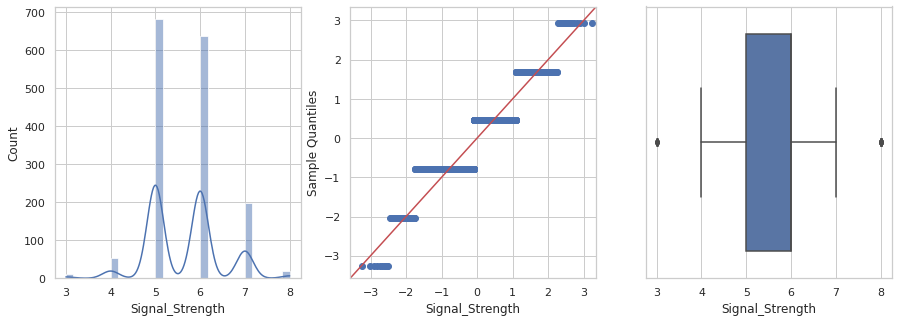

In [47]:
### Distribution of data
for column_name in data.columns:
  fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
  sns.histplot(data = data,x=column_name,kde=True,ax=ax[0])
  sm.qqplot(data[column_name],ax=ax[1],line='45',fit=True)
  ax[1].set_xlabel(column_name)
  sns.boxplot(data=data,x=column_name,ax=ax[2])
  plt.show()



- Paramter 8 & 9 - follows normal distribution , other independent features are right skewed data / parameter 3 has multiple peaks in the distribution
- Target values range from 3 - 8 , where observation count from 5 & 6 are high than others.

#### Data Stat

In [48]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Parameter_1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter_2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter_3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter_4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter_5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter_6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter_7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter_8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter_9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter_10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


 - all the parameter has different scale in there distribution

### NN Building

In [49]:
X = data.drop("Signal_Strength",axis=1)
y = data.filter(["Signal_Strength"])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=123)

In [52]:
X_train.shape

(1279, 11)

In [53]:
def nn_model(X_train,lr=0.1,momentum=0.9,dropout=0.2):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
 	model.add(Dense(64, activation='relu'))

	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=lr, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model 

In [54]:
nn_model(X_train).summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 13        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
